In [2]:
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A

In [ ]:
# Example pipeline
transform = A.Compose([
    A.RandomCrop(width=256, height=256),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])

In [ ]:
# read imaage from opencv
image = cv2.imread("/path/to/image.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
# Step 4. Pass images to the augmentation pipeline and receive augmented images
transformed = transform(image=image)

In [ ]:
transformed_image = transformed["image"]

In [ ]:
another_transformed_image = transform(image=another_image)["image"]

In [ ]:
transform = A.Compose([
    A.RandomBrightnessContrast(brightness_limit=1, contrast_limit=1, p=1.0),
])
transformed_image_1 = transform(image=image)['image']
transformed_image_2 = transform(image=image)['image']
transformed_image_3 = transform(image=image)['image']

In [3]:
# visualization function
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

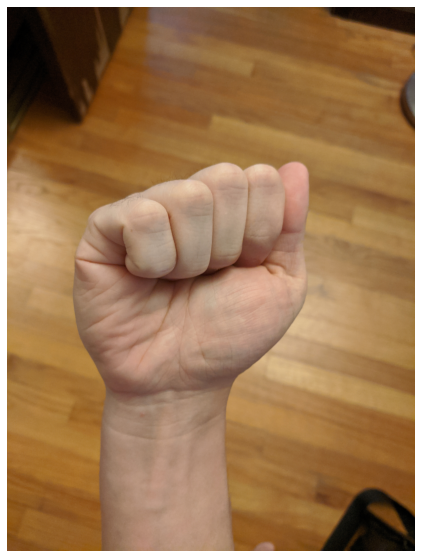

In [4]:
image = cv2.imread('images/test/A/A0.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
visualize(image)

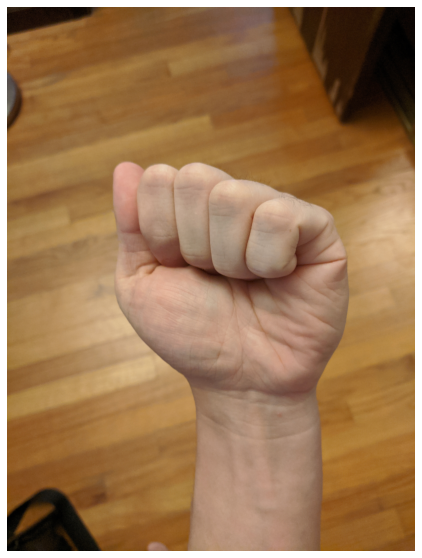

In [12]:
transform = A.HorizontalFlip(p=0.5)
random.seed()
augmented_image = transform(image=image)['image']
visualize(augmented_image)

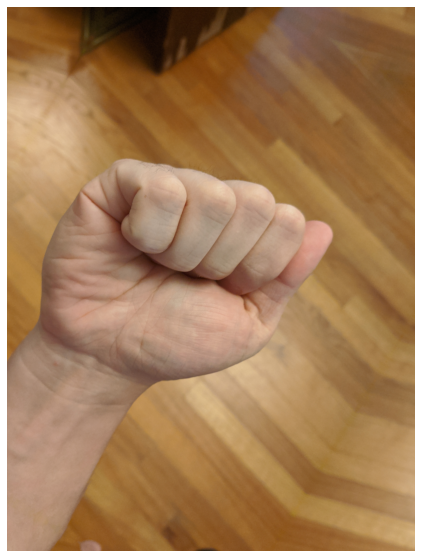

In [13]:
transform = A.ShiftScaleRotate(p=0.5)
random.seed(7) 
augmented_image = transform(image=image)['image']
visualize(augmented_image)

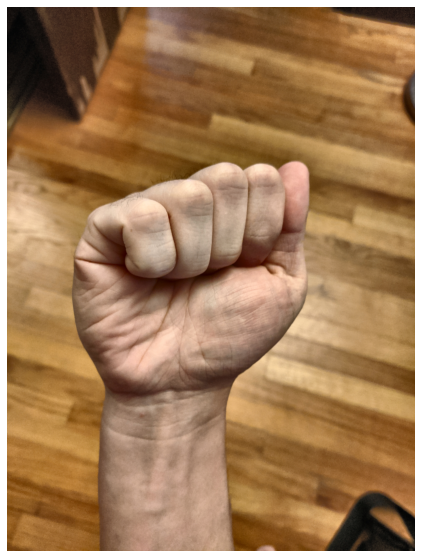

In [14]:
transform = A.Compose([
    A.CLAHE(),
    A.RandomRotate90(),
    A.Transpose(),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50, rotate_limit=45, p=.75),
    A.Blur(blur_limit=3),
    A.OpticalDistortion(),
    A.GridDistortion(),
    A.HueSaturationValue(),
])
random.seed(42) 
augmented_image = transform(image=image)['image']
visualize(augmented_image)

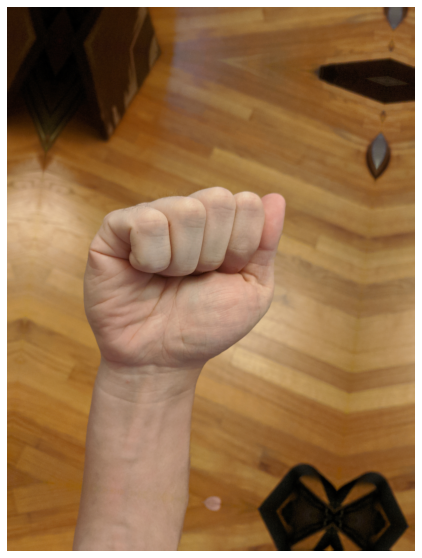

In [15]:
transform = A.Compose([
        A.RandomRotate90(),
        A.Flip(),
        A.Transpose(),
        A.OneOf([
            A.IAAAdditiveGaussianNoise(),
            A.GaussNoise(),
        ], p=0.2),
        A.OneOf([
            A.MotionBlur(p=.2),
            A.MedianBlur(blur_limit=3, p=0.1),
            A.Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        A.OneOf([
            A.OpticalDistortion(p=0.3),
            A.GridDistortion(p=.1),
            A.IAAPiecewiseAffine(p=0.3),
        ], p=0.2),
        A.OneOf([
            A.CLAHE(clip_limit=2),
            A.IAASharpen(),
            A.IAAEmboss(),
            A.RandomBrightnessContrast(),            
        ], p=0.3),
        A.HueSaturationValue(p=0.3),
    ])
random.seed(42) 
augmented_image = transform(image=image)['image']
visualize(augmented_image)

# Define functions to visualize bounding boxes and class labels on an image

In [16]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)

    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

In [ ]:
image = cv2.imread('images/000000386298.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
bboxes = [[5.66, 138.95, 147.09, 164.88], [366.7, 80.84, 132.8, 181.84]]
category_ids = [17, 18]

# We will use the mapping from category_id to the class name
# to visualize the class label for the bounding box on the image
category_id_to_name = {17: 'cat', 18: 'dog'}

In [17]:
visualize(image, bboxes, category_ids, category_id_to_name)


NameError: name 'bboxes' is not defined

In [ ]:
# Augmentation pipeline
transform = A.Compose(
    [A.HorizontalFlip(p=0.5)],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)


In [ ]:
# transformation of image and bbox with ids
random.seed()
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

## Anaother example

In [ ]:
transform = A.Compose(
    [A.ShiftScaleRotate(p=0.5)],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)


In [ ]:
random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

# Complex Augmentation pipeline

In [ ]:
transform = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.ShiftScaleRotate(p=0.5),
        A.RandomBrightnessContrast(p=0.3),
        A.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=0.3),
    ],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)


In [ ]:
random.seed(7)
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)


#  an augmentation pipeline with the default values for min_area and min_visibilty

In [ ]:
transform = A.Compose(
    [A.CenterCrop(height=280, width=280, p=1)],
    bbox_params=A.BboxParams(format='coco', label_fields=['category_ids']),
)

In [ ]:
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

# an augmentation pipeline with min_area

In [ ]:
transform = A.Compose(
    [A.CenterCrop(height=280, width=280, p=1)],
    bbox_params=A.BboxParams(format='coco', min_area=4500, label_fields=['category_ids']),
)

In [ ]:
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

# an augmentation pipeline with min_visibility

In [ ]:
transform = A.Compose(
    [A.CenterCrop(height=280, width=280, p=1)],
    bbox_params=A.BboxParams(format='coco', min_visibility=0.3, label_fields=['category_ids']),
)

In [ ]:
transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)

# Define functions to visualize bounding boxes and class labels on an image

In [18]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)

    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

In [ ]:
# pfeatherstone
# https://github.com/ultralytics/yolov5/issues/209

import  albumentations as albu

albu.Compose([albu.OneOf([albu.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.7),
                                             albu.RandomGamma(gamma_limit=(50, 150), p=0.7),
                                             albu.RGBShift(p=0.7),
                                             albu.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=15, val_shift_limit=10, p=0.7),
                                             albu.CLAHE(p=0.7),
                                             albu.ImageCompression(quality_lower=30),
                                             albu.GaussNoise(p=0.7),
                                             albu.GaussianBlur(p=0.7),
                                             albu.MedianBlur(p=0.7),
                                             albu.ChannelShuffle(p=0.7),
                                             albu.CoarseDropout(p=0.7),
                                             albu.Equalize(p=0.7),
                                             albu.FancyPCA(p=0.7),
                                             albu.IAAEmboss(p=0.7),
                                             albu.IAASharpen(p=0.7),
                                             albu.ISONoise(p=0.7),
                                             albu.Posterize(p=0.7),
                                             albu.InvertImg(),
                                             albu.MotionBlur(always_apply=True),
                                             albu.RandomRain(),
                                             albu.RandomShadow(),
                                             albu.RandomSnow(),
                                             albu.Solarize()]),
                                 albu.OneOf([albu.VerticalFlip(p=0.2),
                                             albu.HorizontalFlip(),
                                             albu.Transpose(p=0.2),
                                             albu.ShiftScaleRotate()])],
                                bbox_params=albu.BboxParams(format='coco', label_fields=['category_id']))
